togo_dapanog_qc Dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "../data/togo-dapaong_qc.csv"
dataset= pd.read_csv(file_path)
print(dataset.head(5))

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [12]:
dataset.shape

(525600, 19)

In [14]:
print("Column names and data types:")
print(dataset.dtypes)

Column names and data types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [13]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 16


Exploratory Data Analysis (EDA) analysis

In [15]:
print("\nDescriptive statistics for numerical variables:")
print(dataset.describe())


Descriptive statistics for numerical variables:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000   

 Data Quality Check

In [18]:

print("\nData Quality Check:")
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:",missing_values)


# Check for outliers or incorrect entries
# You can define thresholds or criteria based on domain knowledge
# For example, for columns GHI, DNI, and DHI, you may want to check for negative values
outliers_GHI = dataset[dataset['GHI'] < 0]
outliers_DNI = dataset[dataset['DNI'] < 0]
outliers_DHI = dataset[dataset['DHI'] < 0]

if not outliers_GHI.empty:
    print("Outliers in GHI column:")
    print(outliers_GHI)
else:
    print("No outliers found in GHI column")

if not outliers_DNI.empty:
    print("\nOutliers in DNI column:")
    print(outliers_DNI)
else:
    print("No outliers found in DNI column")

if not outliers_DHI.empty:
    print("\nOutliers in DHI column:")
    print(outliers_DHI)
else:
    print("No outliers found in DHI column")


Data Quality Check:
Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Outliers in GHI column:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3  

Time Series Analysis

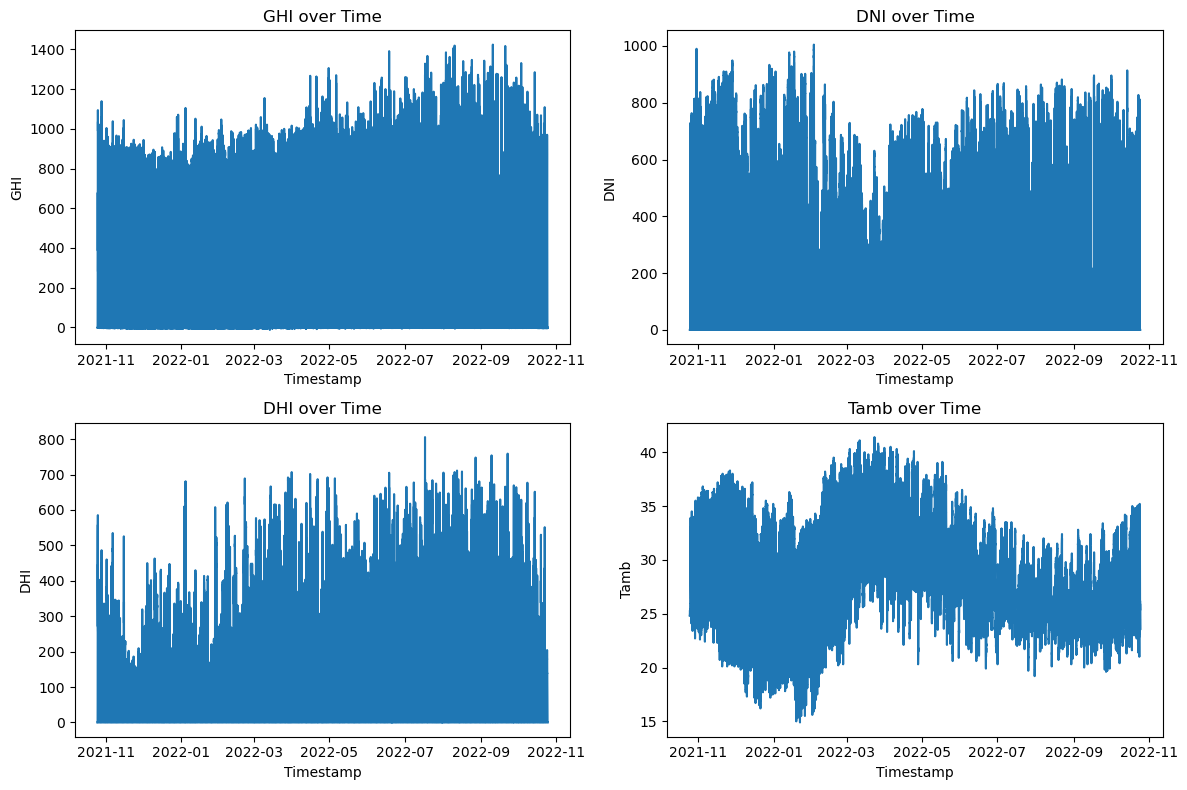

In [19]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.lineplot(x='Timestamp', y='GHI', data=dataset)
plt.title('GHI over Time')


plt.subplot(2, 2, 2)
sns.lineplot(x='Timestamp', y='DNI', data=dataset)
plt.title('DNI over Time')


plt.subplot(2, 2, 3)
sns.lineplot(x='Timestamp', y='DHI', data=dataset)
plt.title('DHI over Time')


plt.subplot(2, 2, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=dataset)
plt.title('Tamb over Time')

plt.tight_layout()
plt.show()

correlation  analysis plot

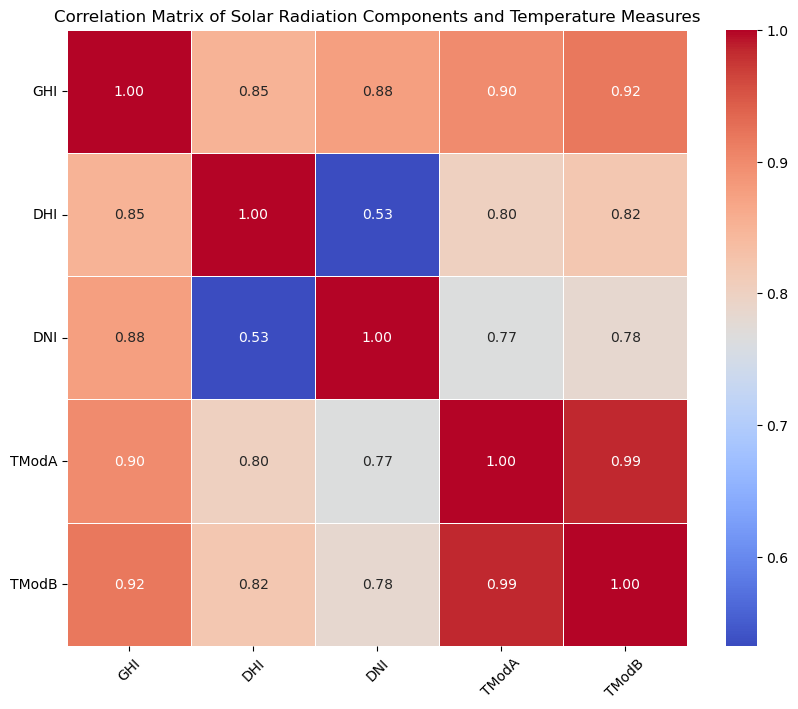

In [20]:
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']
dataset_subset = dataset[columns_of_interest]


correlation_matrix = dataset_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Wind Analysis

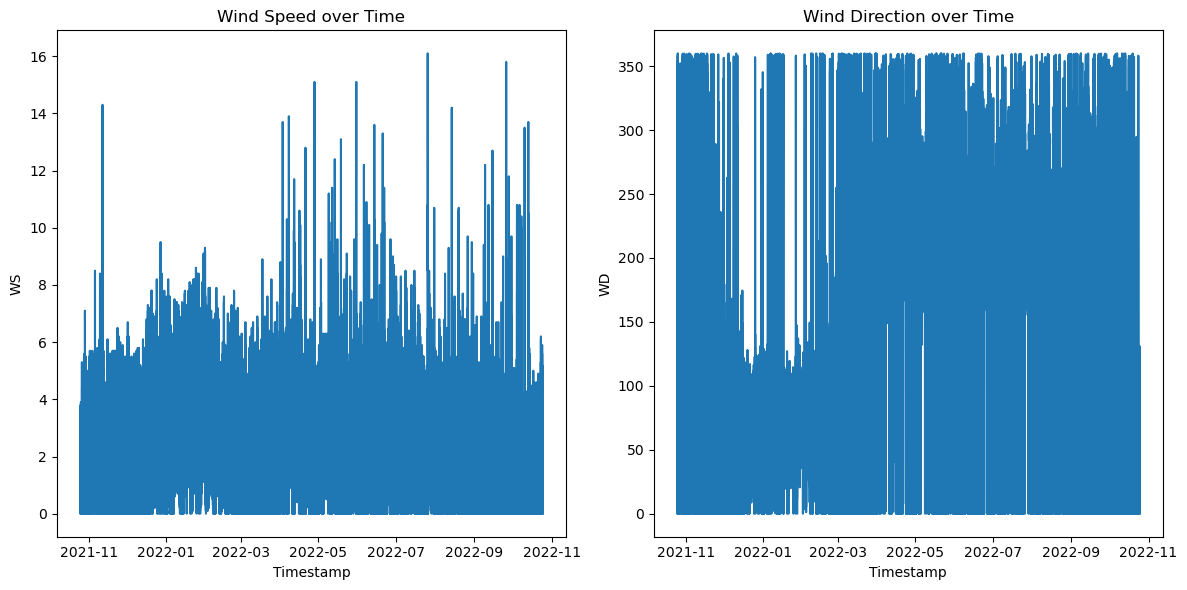

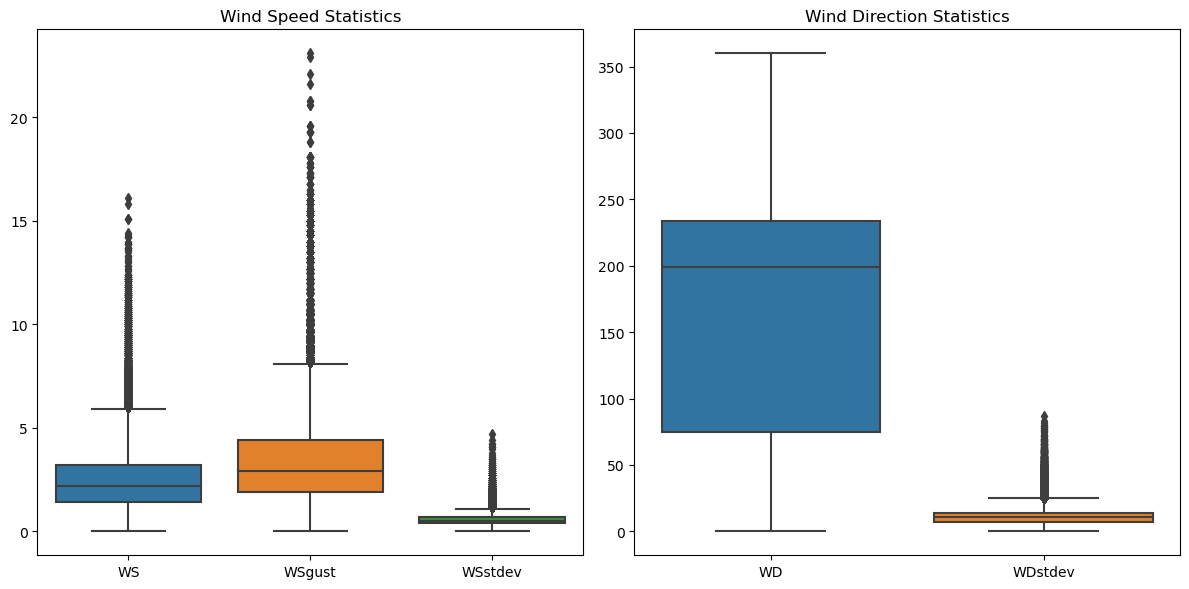

In [21]:

wind_columns = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
dataset_wind = dataset[wind_columns]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Timestamp', y='WS', data=dataset)
plt.title('Wind Speed over Time')


plt.subplot(1, 2, 2)
sns.lineplot(x='Timestamp', y='WD', data=dataset)
plt.title('Wind Direction over Time')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset_wind[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Statistics')


plt.subplot(1, 2, 2)
sns.boxplot(data=dataset_wind[['WD', 'WDstdev']], orient='v')
plt.title('Wind Direction Statistics')

plt.tight_layout()
plt.show()

Temperature Analysis

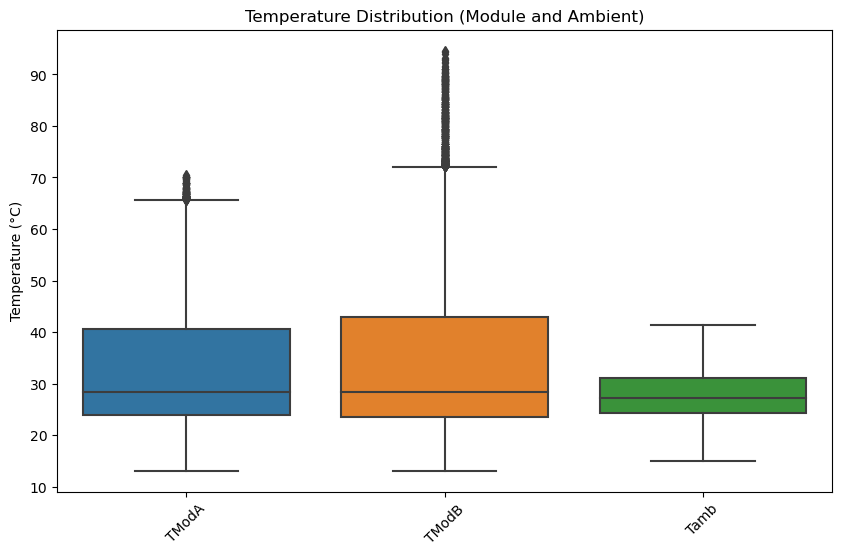

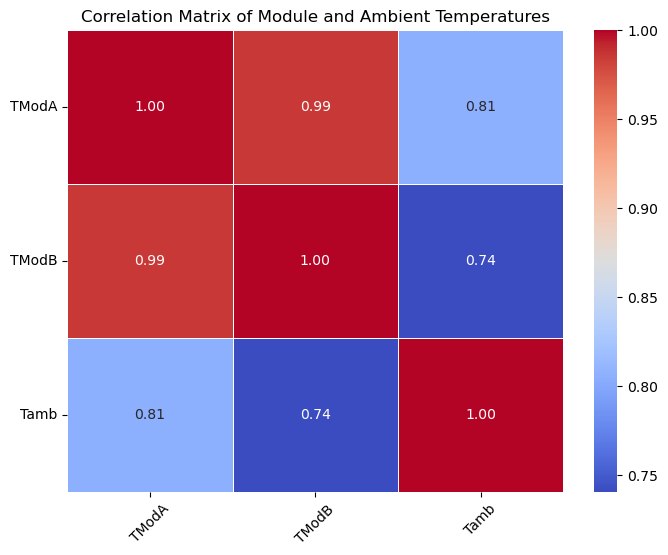

In [22]:

temperature_columns = ['TModA', 'TModB', 'Tamb']
dataset_temperatures = dataset[temperature_columns]


plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_temperatures, orient='v')
plt.title('Temperature Distribution (Module and Ambient)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(dataset_temperatures.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Module and Ambient Temperatures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

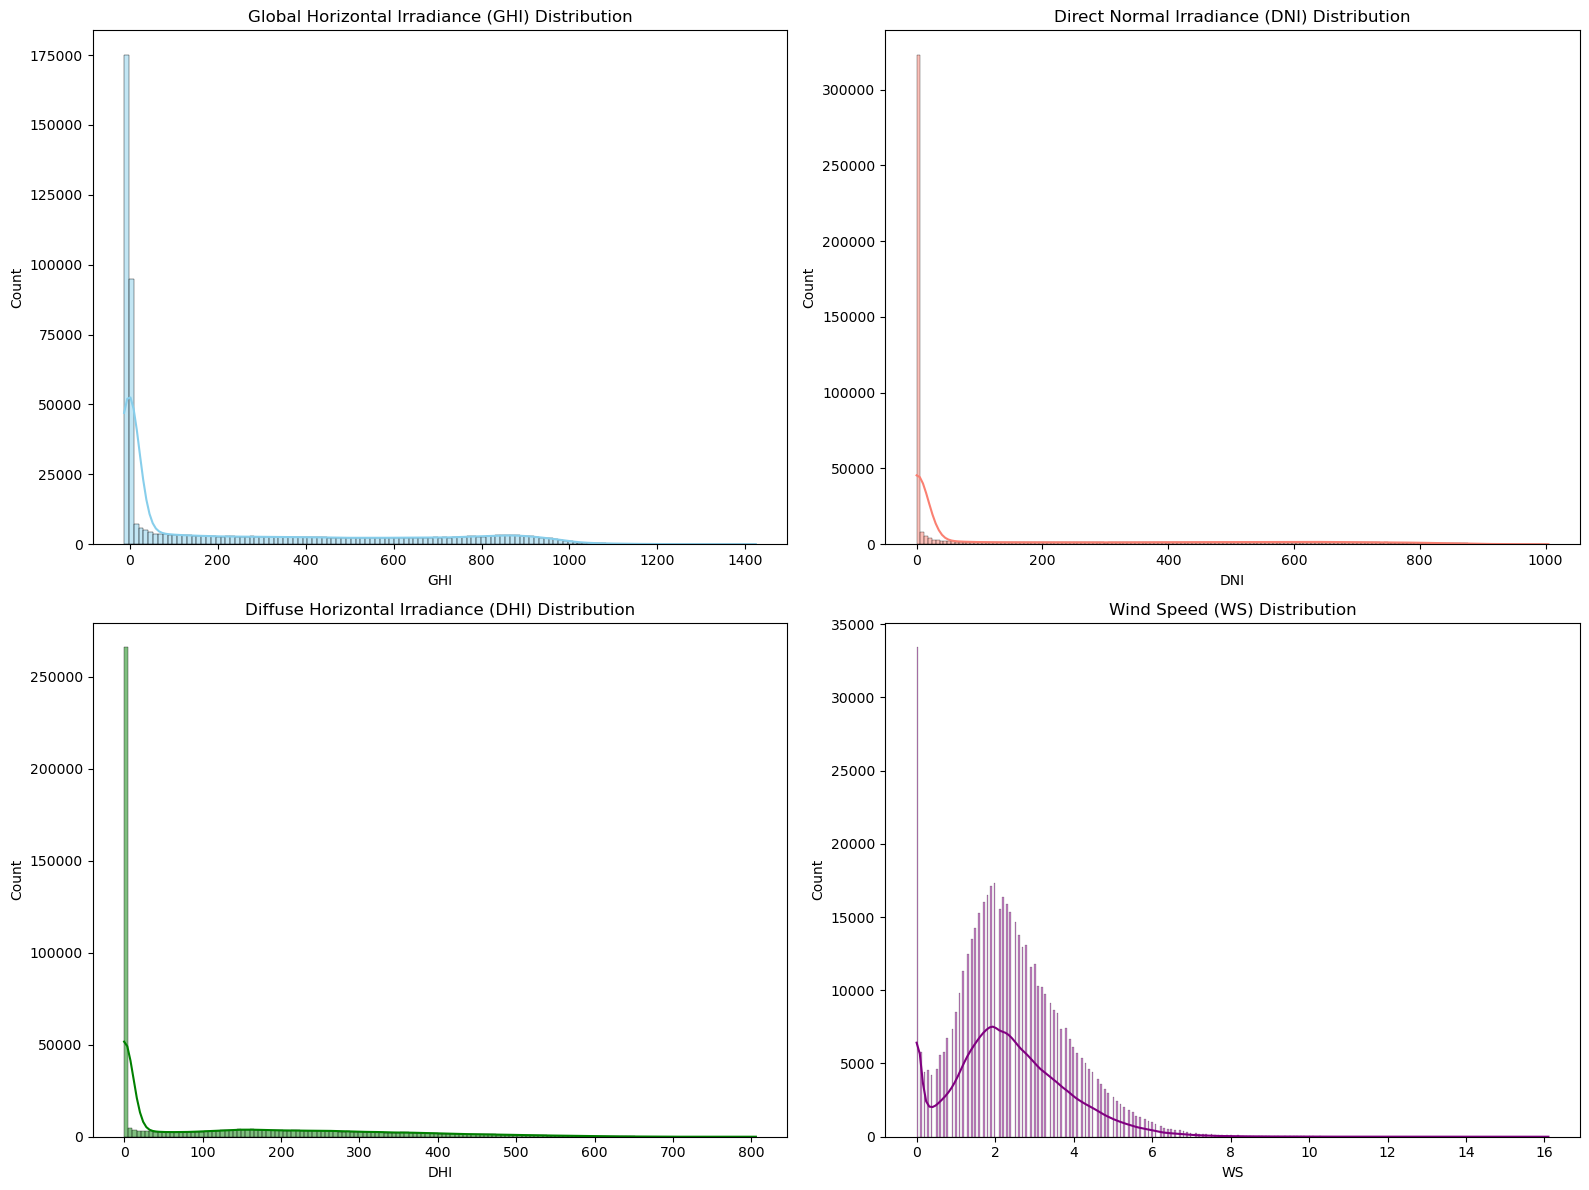

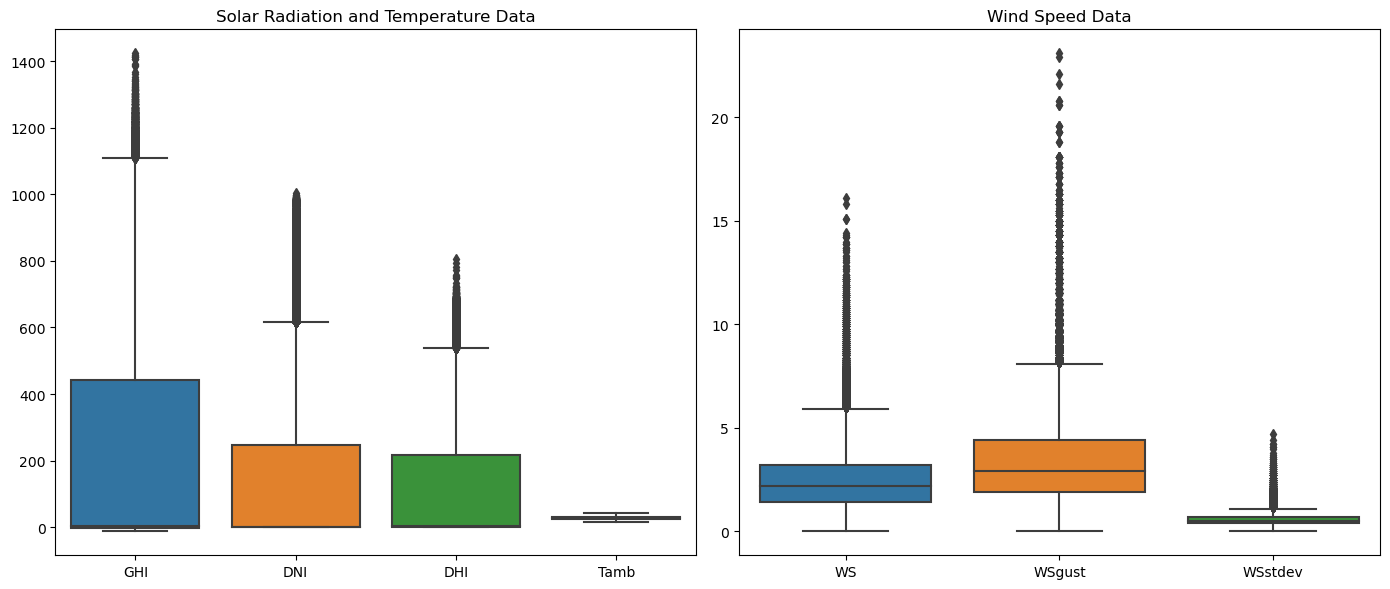

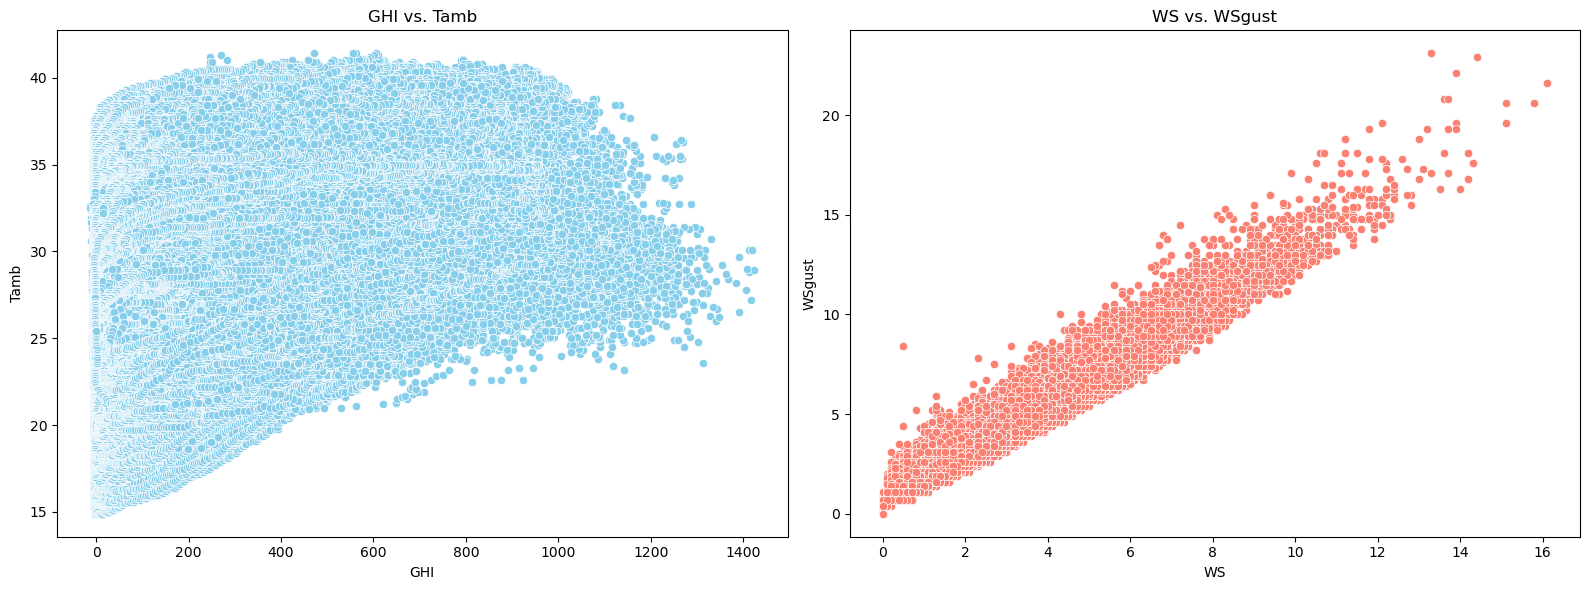

In [24]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(dataset['GHI'], kde=True, color='skyblue')
plt.title('Global Horizontal Irradiance (GHI) Distribution')

plt.subplot(2, 2, 2)
sns.histplot(dataset['DNI'], kde=True, color='salmon')
plt.title('Direct Normal Irradiance (DNI) Distribution')

plt.subplot(2, 2, 3)
sns.histplot(dataset['DHI'], kde=True, color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(dataset['WS'], kde=True, color='purple')
plt.title('Wind Speed (WS) Distribution')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dataset[['GHI', 'DNI', 'DHI', 'Tamb']], orient='v')
plt.title('Solar Radiation and Temperature Data')

plt.subplot(1, 2, 2)
sns.boxplot(data=dataset[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Data')

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='GHI', y='Tamb', data=dataset, color='skyblue')
plt.title('GHI vs. Tamb')

plt.subplot(1, 2, 2)
sns.scatterplot(x='WS', y='WSgust', data=dataset, color='salmon')
plt.title('WS vs. WSgust')

plt.tight_layout()
plt.show()

In [26]:
dataset.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [29]:
dataset.dropna()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8


In [30]:

# Step 1: Identify Missing Values
missing_comments = dataset['Comments'].isnull().all()

# Step 2: Handle Missing Values

    # Since the 'Comments' column appears entirely null, you might decide to drop it
dataset.drop(columns=['Comments'], inplace=True)
print("The 'Comments' column was entirely null and has been dropped.")





KeyError: 'Comments'

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

new clean dataset

In [32]:
dataset.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64